In [1]:
import tensorflow as tf
tf.random.set_seed(42)
tf.__version__

'2.1.0'

## Load data

In [2]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data(test_split=0.2, seed=42)

In [3]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

## Data Preparation: normalization

In [4]:
def norm(x, mean, std):
    return (x - mean) / std

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
normed_train_data = norm(train_data, mean, std)
normed_test_data = norm(test_data, mean, std)


## Build up an MLP

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[13]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Now try out the model. Take a batch of 5 examples from the training data and call model.predict on it.
example_batch = normed_train_data[:5]
example_result = model.predict(example_batch)
example_result

array([[-0.09948659],
       [-0.5244523 ],
       [-0.3844368 ],
       [-0.02609236],
       [-0.16730449]], dtype=float32)

In [8]:
# Prepare the network ready for training
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae', 'mse'])

In [9]:
# Customize the optimizer configuration (learning rate here)
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

### Train & test the model

In [10]:
model.fit(normed_train_data, train_targets, epochs=200, batch_size=1, verbose=1)

Train on 404 samples
Epoch 1/200
404/404 [==============================] - 2s 5ms/sample - loss: 165.7786 - mae: 9.5625 - mse: 165.7786
Epoch 2/200
404/404 [==============================] - 1s 4ms/sample - loss: 24.8323 - mae: 3.4583 - mse: 24.8323
Epoch 3/200
404/404 [==============================] - 1s 3ms/sample - loss: 18.1445 - mae: 2.9409 - mse: 18.1444
Epoch 4/200
404/404 [==============================] - 1s 4ms/sample - loss: 16.3624 - mae: 2.7245 - mse: 16.3624
Epoch 5/200
404/404 [==============================] - 1s 3ms/sample - loss: 14.4999 - mae: 2.5793 - mse: 14.4999
Epoch 6/200
404/404 [==============================] - 1s 3ms/sample - loss: 13.8900 - mae: 2.4680 - mse: 13.8900
Epoch 7/200
404/404 [==============================] - 1s 4ms/sample - loss: 13.3120 - mae: 2.4207 - mse: 13.3120
Epoch 8/200
404/404 [==============================] - 1s 4ms/sample - loss: 13.1158 - mae: 2.3509 - mse: 13.1158
Epoch 9/200
404/404 [==============================] - 1s 3ms/sam

404/404 [==============================] - 2s 4ms/sample - loss: 4.8351 - mae: 1.5014 - mse: 4.8351
Epoch 74/200
404/404 [==============================] - 1s 3ms/sample - loss: 5.1465 - mae: 1.5479 - mse: 5.1465
Epoch 75/200
404/404 [==============================] - 1s 4ms/sample - loss: 5.0562 - mae: 1.4851 - mse: 5.0561
Epoch 76/200
404/404 [==============================] - 1s 3ms/sample - loss: 4.8474 - mae: 1.5026 - mse: 4.8474
Epoch 77/200
404/404 [==============================] - 2s 4ms/sample - loss: 4.9272 - mae: 1.4717 - mse: 4.9272
Epoch 78/200
404/404 [==============================] - 1s 4ms/sample - loss: 4.5884 - mae: 1.4910 - mse: 4.5884
Epoch 79/200
404/404 [==============================] - 1s 3ms/sample - loss: 4.5864 - mae: 1.4618 - mse: 4.5864 1s - loss: 5.1151 - 
Epoch 80/200
404/404 [==============================] - 1s 4ms/sample - loss: 4.4804 - mae: 1.4484 - mse: 4.4804
Epoch 81/200
404/404 [==============================] - 1s 4ms/sample - loss: 4.5838 - m

404/404 [==============================] - 1s 3ms/sample - loss: 3.1621 - mae: 1.2374 - mse: 3.1621
Epoch 146/200
404/404 [==============================] - 1s 4ms/sample - loss: 3.0945 - mae: 1.1976 - mse: 3.0945
Epoch 147/200
404/404 [==============================] - 2s 4ms/sample - loss: 3.1782 - mae: 1.2115 - mse: 3.1782
Epoch 148/200
404/404 [==============================] - 1s 3ms/sample - loss: 2.9055 - mae: 1.1727 - mse: 2.9055
Epoch 149/200
404/404 [==============================] - 1s 3ms/sample - loss: 3.0692 - mae: 1.1892 - mse: 3.0692
Epoch 150/200
404/404 [==============================] - 1s 4ms/sample - loss: 3.0746 - mae: 1.2254 - mse: 3.0746
Epoch 151/200
404/404 [==============================] - 1s 4ms/sample - loss: 2.9674 - mae: 1.1768 - mse: 2.9674 1s - loss: 3.2712 
Epoch 152/200
404/404 [==============================] - 1s 4ms/sample - loss: 2.9719 - mae: 1.1925 - mse: 2.9719
Epoch 153/200
404/404 [==============================] - 1s 4ms/sample - loss: 2.94

In [11]:
loss, mae, mse = model.evaluate(normed_test_data, test_targets, verbose=0)
mse

13.402227

### Tune the number of epochs

In [12]:
# Train the model (in silent mode, verbose=0)

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[normed_train_data.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
        ])
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae', 'mse'])
    return model

model = build_model()

EPOCHS=500
history = model.fit(normed_train_data, train_targets,
                    validation_split = 0.2,
                    epochs=EPOCHS, batch_size=1, verbose=1)

Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 2s 6ms/sample - loss: 198.6222 - mae: 10.6018 - mse: 198.6222 - val_loss: 30.8948 - val_mae: 4.1857 - val_mse: 30.8948
Epoch 2/500
323/323 [==============================] - 1s 4ms/sample - loss: 29.5180 - mae: 3.6669 - mse: 29.5180 - val_loss: 19.0279 - val_mae: 3.4257 - val_mse: 19.0279
Epoch 3/500
323/323 [==============================] - 1s 4ms/sample - loss: 21.1121 - mae: 3.0928 - mse: 21.1121 - val_loss: 17.1516 - val_mae: 3.0275 - val_mse: 17.1516
Epoch 4/500
323/323 [==============================] - 1s 4ms/sample - loss: 17.9529 - mae: 2.7676 - mse: 17.9529 - val_loss: 17.4779 - val_mae: 3.3421 - val_mse: 17.4779
Epoch 5/500
323/323 [==============================] - 1s 4ms/sample - loss: 16.4122 - mae: 2.7144 - mse: 16.4122 - val_loss: 13.9659 - val_mae: 2.9398 - val_mse: 13.9659
Epoch 6/500
323/323 [==============================] - 1s 4ms/sample - loss: 14.4591 - mae: 2.472

Epoch 49/500
323/323 [==============================] - 1s 4ms/sample - loss: 7.9118 - mae: 1.6928 - mse: 7.9118 - val_loss: 10.7010 - val_mae: 2.5845 - val_mse: 10.7010
Epoch 50/500
323/323 [==============================] - 1s 4ms/sample - loss: 7.6953 - mae: 1.6614 - mse: 7.6953 - val_loss: 10.3741 - val_mae: 2.5416 - val_mse: 10.3741
Epoch 51/500
323/323 [==============================] - 1s 4ms/sample - loss: 7.7809 - mae: 1.6801 - mse: 7.7809 - val_loss: 10.1124 - val_mae: 2.4982 - val_mse: 10.1124
Epoch 52/500
323/323 [==============================] - 1s 4ms/sample - loss: 7.6870 - mae: 1.6716 - mse: 7.6870 - val_loss: 9.7349 - val_mae: 2.3571 - val_mse: 9.7349
Epoch 53/500
323/323 [==============================] - 1s 4ms/sample - loss: 7.2040 - mae: 1.6891 - mse: 7.2040 - val_loss: 9.7117 - val_mae: 2.5070 - val_mse: 9.7117
Epoch 54/500
323/323 [==============================] - 1s 4ms/sample - loss: 7.2157 - mae: 1.6343 - mse: 7.2157 - val_loss: 9.5899 - val_mae: 2.5165 - va

Epoch 98/500
323/323 [==============================] - 1s 4ms/sample - loss: 3.8806 - mae: 1.3300 - mse: 3.8806 - val_loss: 9.8065 - val_mae: 2.4738 - val_mse: 9.8065
Epoch 99/500
323/323 [==============================] - 1s 4ms/sample - loss: 3.9554 - mae: 1.2855 - mse: 3.9554 - val_loss: 8.3774 - val_mae: 2.3139 - val_mse: 8.3774
Epoch 100/500
323/323 [==============================] - 1s 4ms/sample - loss: 4.4324 - mae: 1.3635 - mse: 4.4324 - val_loss: 8.6565 - val_mae: 2.3713 - val_mse: 8.6565
Epoch 101/500
323/323 [==============================] - 1s 4ms/sample - loss: 3.8330 - mae: 1.2791 - mse: 3.8330 - val_loss: 9.0947 - val_mae: 2.2195 - val_mse: 9.0947
Epoch 102/500
323/323 [==============================] - 1s 4ms/sample - loss: 3.9170 - mae: 1.3835 - mse: 3.9170 - val_loss: 9.4845 - val_mae: 2.4147 - val_mse: 9.4845
Epoch 103/500
323/323 [==============================] - 1s 4ms/sample - loss: 3.5090 - mae: 1.2859 - mse: 3.5090 - val_loss: 10.7031 - val_mae: 2.4037 - val

323/323 [==============================] - 1s 4ms/sample - loss: 2.2742 - mae: 1.0770 - mse: 2.2742 - val_loss: 11.6254 - val_mae: 2.7809 - val_mse: 11.6254
Epoch 195/500
323/323 [==============================] - 1s 4ms/sample - loss: 2.4031 - mae: 1.0797 - mse: 2.4031 - val_loss: 10.5602 - val_mae: 2.5595 - val_mse: 10.5602
Epoch 196/500
323/323 [==============================] - 1s 4ms/sample - loss: 2.0239 - mae: 0.9975 - mse: 2.0239 - val_loss: 11.0757 - val_mae: 2.6374 - val_mse: 11.0757
Epoch 197/500
323/323 [==============================] - 1s 4ms/sample - loss: 2.0646 - mae: 1.0224 - mse: 2.0646 - val_loss: 8.7433 - val_mae: 2.3221 - val_mse: 8.7433
Epoch 198/500
323/323 [==============================] - 1s 4ms/sample - loss: 2.3153 - mae: 1.0383 - mse: 2.3153 - val_loss: 8.7125 - val_mae: 2.2982 - val_mse: 8.7125
Epoch 199/500
323/323 [==============================] - 1s 4ms/sample - loss: 2.1211 - mae: 1.0284 - mse: 2.1211 - val_loss: 9.7594 - val_mae: 2.4909 - val_mse: 9

323/323 [==============================] - 1s 4ms/sample - loss: 1.7450 - mae: 0.9446 - mse: 1.7450 - val_loss: 7.9628 - val_mae: 2.1346 - val_mse: 7.9628
Epoch 291/500
323/323 [==============================] - 1s 5ms/sample - loss: 1.5831 - mae: 0.9246 - mse: 1.5831 - val_loss: 10.0621 - val_mae: 2.5906 - val_mse: 10.0621
Epoch 292/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.4598 - mae: 0.8911 - mse: 1.4598 - val_loss: 9.9275 - val_mae: 2.4115 - val_mse: 9.9275
Epoch 293/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.6477 - mae: 0.9318 - mse: 1.6477 - val_loss: 8.5502 - val_mae: 2.3424 - val_mse: 8.5502
Epoch 294/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.8382 - mae: 0.8839 - mse: 1.8382 - val_loss: 8.5819 - val_mae: 2.3656 - val_mse: 8.5819
Epoch 295/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.3297 - mae: 0.8333 - mse: 1.3297 - val_loss: 7.5367 - val_mae: 2.1353 - val_mse: 7.536

323/323 [==============================] - 1s 4ms/sample - loss: 1.2393 - mae: 0.8109 - mse: 1.2393 - val_loss: 8.4058 - val_mae: 2.3035 - val_mse: 8.4058
Epoch 387/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.2385 - mae: 0.8219 - mse: 1.2385 - val_loss: 7.9167 - val_mae: 2.2634 - val_mse: 7.9167
Epoch 388/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.1971 - mae: 0.7979 - mse: 1.1971 - val_loss: 11.6591 - val_mae: 2.6687 - val_mse: 11.6592
Epoch 389/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.2206 - mae: 0.8071 - mse: 1.2206 - val_loss: 9.3654 - val_mae: 2.4727 - val_mse: 9.3654
Epoch 390/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.3916 - mae: 0.8065 - mse: 1.3916 - val_loss: 9.2429 - val_mae: 2.4311 - val_mse: 9.2429
Epoch 391/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.1937 - mae: 0.7793 - mse: 1.1937 - val_loss: 9.0344 - val_mae: 2.3777 - val_mse: 9.034

323/323 [==============================] - 1s 4ms/sample - loss: 1.0522 - mae: 0.7127 - mse: 1.0522 - val_loss: 8.2495 - val_mae: 2.2629 - val_mse: 8.2495
Epoch 483/500
323/323 [==============================] - 1s 5ms/sample - loss: 1.0019 - mae: 0.7143 - mse: 1.0019 - val_loss: 9.6657 - val_mae: 2.3601 - val_mse: 9.6657
Epoch 484/500
323/323 [==============================] - 1s 4ms/sample - loss: 0.9580 - mae: 0.7004 - mse: 0.9580 - val_loss: 9.3722 - val_mae: 2.4656 - val_mse: 9.3722
Epoch 485/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.1373 - mae: 0.7381 - mse: 1.1373 - val_loss: 8.9433 - val_mae: 2.4424 - val_mse: 8.9433
Epoch 486/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.1431 - mae: 0.7231 - mse: 1.1431 - val_loss: 8.6704 - val_mae: 2.2863 - val_mse: 8.6704
Epoch 487/500
323/323 [==============================] - 1s 4ms/sample - loss: 0.9166 - mae: 0.6807 - mse: 0.9166 - val_loss: 8.6619 - val_mae: 2.3300 - val_mse: 8.6619


In [14]:
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.987719,0.722450,0.987719,8.025066,2.243581,8.025067,495
496,0.880890,0.668517,0.880890,9.504147,2.449735,9.504148,496
497,1.034901,0.731248,1.034901,10.118095,2.496715,10.118094,497
498,0.993234,0.713567,0.993234,9.167556,2.384409,9.167557,498
499,0.980340,0.725315,0.980341,9.067211,2.351496,9.067211,499


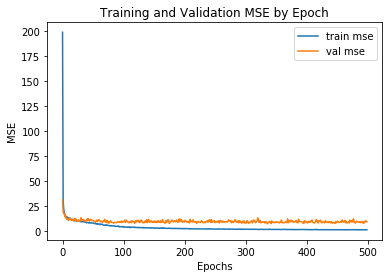

In [15]:
import matplotlib.pyplot as plt

plt.plot(hist['epoch'], hist['mse'], label = "train mse")
plt.plot(hist['epoch'], hist['val_mse'], label = "val mse")
plt.xlabel('Epochs')
plt.ylabel('MSE')
# Set a title of the current axes.
plt.title('Training and Validation MSE by Epoch')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [16]:
import numpy as np
def smooth_curve(values, std=1):
    # gaussian smoothing: Smooths a list of values by convolving with a gussian.
    width = std * 4
    x = np.linspace(-width, width, 2 * width + 1)
    kernel = np.exp(-(x / 5)**2)

    values = np.array(values)
    weights = np.ones_like(values)

    smoothed_values = np.convolve(values, kernel, mode='same')
    smoothed_weights = np.convolve(weights, kernel, mode='same')

    return smoothed_values / smoothed_weights

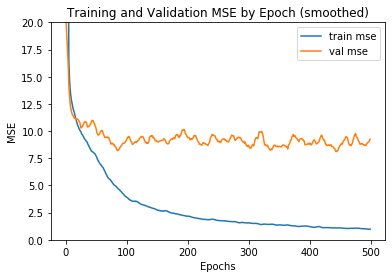

In [17]:
import matplotlib.pyplot as plt

plt.plot(hist['epoch'], smooth_curve(hist['mse']), label = "train mse")
plt.plot(hist['epoch'], smooth_curve(hist['val_mse']), label = "val mse")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim((0, 20)) 
# Set a title of the current axes.
plt.title('Training and Validation MSE by Epoch (smoothed)')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Final fit model with full data & test model

In [20]:
model = build_model()
model.fit(normed_train_data, train_targets, epochs=90, batch_size=1, verbose=1)

Train on 404 samples
Epoch 1/90
404/404 [==============================] - 2s 4ms/sample - loss: 139.3141 - mae: 8.5046 - mse: 139.3141
Epoch 2/90
404/404 [==============================] - 1s 3ms/sample - loss: 21.0550 - mae: 3.1033 - mse: 21.0550
Epoch 3/90
404/404 [==============================] - 1s 3ms/sample - loss: 16.4457 - mae: 2.6775 - mse: 16.4457
Epoch 4/90
404/404 [==============================] - 1s 4ms/sample - loss: 15.0478 - mae: 2.5291 - mse: 15.0478
Epoch 5/90
404/404 [==============================] - 1s 4ms/sample - loss: 13.3473 - mae: 2.3940 - mse: 13.3473
Epoch 6/90
404/404 [==============================] - 1s 4ms/sample - loss: 13.0666 - mae: 2.3711 - mse: 13.0666
Epoch 7/90
404/404 [==============================] - 1s 3ms/sample - loss: 12.4419 - mae: 2.3440 - mse: 12.4419
Epoch 8/90
404/404 [==============================] - 1s 3ms/sample - loss: 12.3245 - mae: 2.2626 - mse: 12.3245
Epoch 9/90
404/404 [==============================] - 1s 3ms/sample - los

In [19]:
loss, mae, mse = model.evaluate(normed_test_data, test_targets, verbose=0)
mse

8.888464

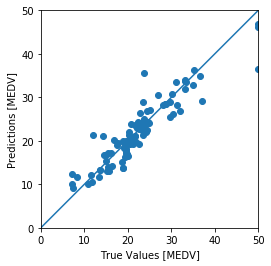

In [21]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_targets, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)